<div style="text-align: right"><strong>Supervised Model Comparison:</strong> <span style="color:darkred">OLS, Log Reg, KNN, Naive Bayes, Decision Tree, Random Forest</span> </div>

<a id="top"></a>

# <span style="color:darkblue">Airline Arrivals</span>

__Author:__ Ryan Harper 

<a href='#ov'>Overview</a><br>
<a href='#exp'>Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>
<a href='#sec3'>3. Models:</a><br>
><a href='#seca'>A. LR - Ordinary Least Squares</a><br>
<a href='#secb'>B. LR - Logistic Regression</a> <a href='#secb1'> (Lasso)</a> <a href='#secb2'> (Ridge)</a><br>
<a href='#secc'>C. NN - K Nearest Neighbors</a><br>
<a href='#secd'>D. NN - Naive Bayes</a><br>
<a href='#sece'>E. NN - Decision Tree</a><br>
<a href='#secf'>F. Ensemble - Random Forest</a><br>

<a href='#sec4'>4. Model Comparison</a><br>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__ <br>
> http://stat-computing.org/dataexpo/2009/the-data.html

__Thinkful Goal:__<br>
> "Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late."

__Variables (health indicators):__
>__year:__ _Year the baby was born_<br>
__gender:__ _sex (1 = male; 0 = female)_ <br>
__name:__ _name of the baby_<br>
__year_count:__ _number of babies with same name for that year for a gender_

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Observations:__
><li> Logistic Regression and Naive Bayes do not outperform other models. Perhaps feature design needs to changed to better fit these models.<li>K Nearest Neighbors and Random Forest tend to out perform the other models but the variance between each sampling is pretty high <li>Lasso and Ridge parameter reductions don't work when applied to the test sample. Perhaps it's only useful for changing parameters?

__Hypothesis:__ 
> Logistic Regression and Naive Bayes will be able to predict gender with the highest prediction percentage irregardless of feature choice.

__Thoughts:__
><li>To better understand the scoring of each model, I need to run each model multiple times on difference samples to get a better feel for the range of prediction scores.<li>I probably need to be consistent with the features that I use (i.e. continuous, ranked, or discrete)

__Method:__
> Using multiple different models. The aim of this project is to explore how different models can handle the data (target and features) and to see what information can be gained from using multiple different models. Ultimately, the goal is to determine which models are appropriate for a binary (discrete) target with features that are both qualitative (discrete) and quantitative (ranked/continuous).

<a id="sec1"></a>

# <span style="color:darkblue">Cleaning the Data</span>  <a href='#top'>(top)</a>

In [1]:
# import matplotlib and numpy together
%pylab

# Restricts popup window (change to '%matplotlib qt') for popup
%matplotlib inline 

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
# iPython features
import time
from pprint import pprint

# Data processing
import pandas as pd
import plotly as plo
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Preparing Models
from sklearn.model_selection import train_test_split

# Models
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB

# Ensemble
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

#Visualization
from IPython.display import Image
import pydotplus
import graphviz

In [3]:
# Import data
arrivals = pd.read_csv('../data/unit3-6/2008.csv')

In [4]:
arrivals = arrivals.sample(frac=.1,random_state=42)

In [5]:
print(arrivals.columns)
arrivals.head()

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1767993,2008,3,28,5,920.0,925,1159.0,1218,CO,1811,...,3.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3073423,2008,6,26,4,1005.0,1005,1142.0,1155,WN,461,...,7.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
922712,2008,2,15,5,2034.0,1959,2133.0,2103,EV,4601,...,4.0,19.0,0,NaN,0,0.0,0.0,30.0,0.0,0.0
1517855,2008,3,10,1,1003.0,1010,1307.0,1326,EV,4684,...,6.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6480817,2008,12,8,1,1131.0,1125,1321.0,1330,WN,1236,...,5.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
arrivals.info(verbose=False, memory_usage=False,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700973 entries, 1767993 to 4442592
Columns: 29 entries, Year to LateAircraftDelay
dtypes: float64(14), int64(10), object(5)

In [7]:
# Confirmation that there are no more null values
arrivals.isnull().values.any()

True

<a id="sec2"></a>

# <span style="color:darkblue">Exploring the Data</span>  <a href='#top'>(top)</a>

In [8]:
corr = arrivals[['DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

corr.corr(method='spearman')

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DepTime,1.000000,0.980892,0.814284,0.855972,-0.007346,-0.032922,-0.027555,-0.039443,0.164464,0.233419,-0.030015,-0.059415,0.025715,0.010743,0.036786,-0.149030,-0.008365,0.291537
CRSDepTime,0.980892,1.000000,0.800641,0.859604,-0.010445,-0.037668,-0.030577,-0.042091,0.118572,0.181142,-0.032535,-0.062857,0.017788,-0.013314,0.020129,-0.140523,-0.007070,0.261898
ArrTime,0.814284,0.800641,1.000000,0.920304,-0.025814,0.066855,0.069428,0.059667,0.128080,0.184969,0.068760,-0.010111,0.051207,-0.040717,0.007805,-0.042917,-0.003726,0.164594
CRSArrTime,0.855972,0.859604,0.920304,1.000000,-0.032996,0.073497,0.084022,0.069943,0.112601,0.181987,0.083518,-0.022164,0.045747,-0.028465,0.020380,-0.095362,-0.006112,0.228478
FlightNum,-0.007346,-0.010445,-0.025814,-0.032996,1.000000,-0.304249,-0.312417,-0.324697,-0.005441,-0.032416,-0.347692,-0.038403,0.007404,0.021084,0.076087,-0.055741,-0.006615,-0.059650
ActualElapsedTime,-0.032922,-0.037668,0.066855,0.073497,-0.304249,1.000000,0.971085,0.974254,0.116332,0.073518,0.952364,0.222570,0.303073,-0.080256,-0.008259,0.353973,-0.000072,-0.157727
CRSElapsedTime,-0.027555,-0.030577,0.069428,0.084022,-0.312417,0.971085,1.000000,0.980913,-0.011400,0.067017,0.976998,0.176507,0.205384,-0.003772,-0.020710,0.134005,0.003171,-0.074371
AirTime,-0.039443,-0.042091,0.059667,0.069943,-0.324697,0.974254,0.980913,1.000000,0.041181,0.066308,0.981572,0.146930,0.151447,-0.022304,-0.026695,0.186670,0.005409,-0.089588
ArrDelay,0.164464,0.118572,0.128080,0.112601,-0.005441,0.116332,-0.011400,0.041181,1.000000,0.665017,-0.001300,0.113705,0.315439,0.138248,0.143645,0.087383,-0.019997,0.323188
DepDelay,0.233419,0.181142,0.184969,0.181987,-0.032416,0.073518,0.067017,0.066308,0.665017,1.000000,0.072227,-0.060866,0.058569,0.275522,0.132339,-0.351038,-0.009552,0.460649


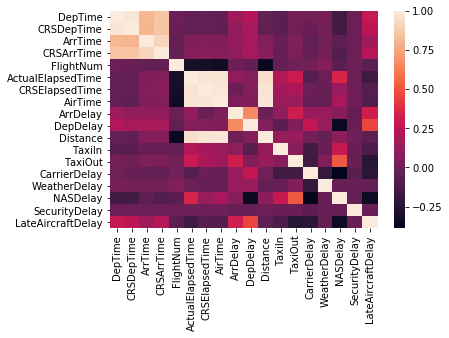

In [9]:
# calculate the correlation matrix (spearman is chosen because most features are not continuous)
corr = corr.corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

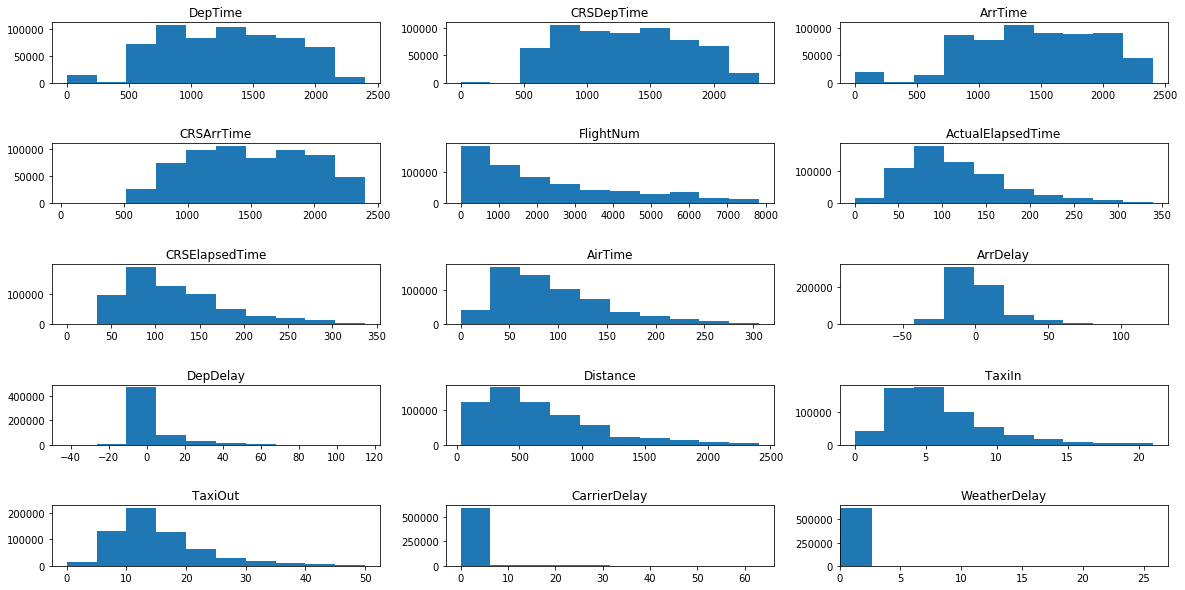

In [10]:
graph = arrivals[['DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].fillna(0)

graph = graph[(np.abs(stats.zscore(graph)) < 3).all(axis=1)]

fig, axs = plt.subplots(5,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1)

axs = axs.ravel()

for i in range(15):
    axs[i].hist(graph.iloc[:,i])
    axs[i].set_title((graph.columns)[i])
    plt.xlim(xmax=graph.iloc[:,i].max(),xmin=graph.iloc[:,i].min())

_FlightNum,CarrierDelay, and WeatherDelay appear to be skewed_

<a id="sec3"></a>

# <span style="color:darkblue">Models:</span>  <a href='#top'>(top)</a>

In [11]:
# feature data for models
features = arrivals.fillna(0).copy()
features.head()
features = features.sample(frac=1.0)


In [12]:
y = features['ArrDelay'].values.reshape(-1, 1).ravel()
X = features[['DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

print(np.shape(y))
print(np.shape(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)  

(700973,)
(700973, 17)


<a id="seca"></a>

### <span style="color:darkblue">A. LR - Ordinary Least Squares</span>  <a href='#top'>(top)</a>

> Target is binary so this model may not be appropriate <br>Many features are binary so model may not be appropriate <br>Predicted values are not binary and need to be rounded up/down

In [13]:
%%capture timeA --no-stderr
%%time

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

In [14]:
regr.coef_

array([-1.47805955e-02,  1.36304905e-02, -2.33212114e-03,  2.88485840e-03,
       -6.71301714e-05, -3.18087905e-01, -3.48846070e-01,  5.33363594e-01,
        5.07535191e-01,  1.48519695e-02,  8.05266863e-01,  8.13854512e-01,
        5.21698733e-01,  5.21514703e-01,  5.67600082e-01,  5.84754430e-01,
        5.19502174e-01])

In [15]:
# Display the attributes
print('Coefficients: \n')
pprint(list(zip(X.columns,regr.coef_)))
print('\nIntercept: \n', regr.intercept_)
coef = list(zip(X.columns,regr.coef_))

Coefficients: 

[('DepTime', -0.014780595454707578),
 ('CRSDepTime', 0.013630490484796183),
 ('ArrTime', -0.0023321211386268022),
 ('CRSArrTime', 0.002884858401249343),
 ('FlightNum', -6.713017136283704e-05),
 ('ActualElapsedTime', -0.3180879048004771),
 ('CRSElapsedTime', -0.34884606955509223),
 ('AirTime', 0.5333635939905212),
 ('DepDelay', 0.5075351909311253),
 ('Distance', 0.014851969462239108),
 ('TaxiIn', 0.8052668633872541),
 ('TaxiOut', 0.8138545118613216),
 ('CarrierDelay', 0.5216987332426039),
 ('WeatherDelay', 0.5215147028011894),
 ('NASDelay', 0.5676000815482415),
 ('SecurityDelay', 0.5847544297552626),
 ('LateAircraftDelay', 0.5195021736896624)]

Intercept: 
 -2.136735037838541


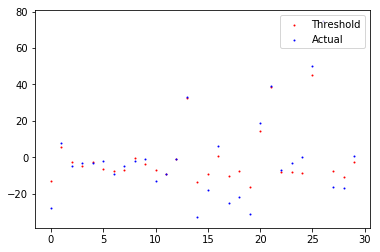

In [16]:
# Visualization of gender approximation
x = list(range(len(y_test[0:30])))
y =[0.5]*len(y_test[0:30])

predY = regr.predict(X_test)
plt.scatter(range(len(y_test[0:30])),predY[0:30],c='red',s=1)
plt.scatter(range(len(y_test[0:30])),y_test[0:30],c='blue',s=1)
plt.legend(['Threshold','Actual','Predicted'],loc='upper right')
plt.show()

In [17]:
# score is low because of approximate values with lin regression - values need to be rounded
regr.score(X_test,y_test)

0.9634465872738653

<a id="secb"></a>

### <span style="color:darkblue">B. LR - Logistic Regression</span>  <a href='#top'>(top)</a>

> Predicting Delay time is continuous so logistic regression won't work

In [18]:
# %%capture timeB --no-stderr
# %%time

# # Instantiate our model.
# lregr = linear_model.LogisticRegression()

# # Fit our model to our data.
# lregr.fit(X_train, y_train)

In [19]:
# lregr.coef_

In [20]:
# # Display the attributes
# print('Coefficients: \n')
# pprint(list(zip(X.columns,lregr.coef_[0])))
# print('\nIntercept: \n', lregr.intercept_)
# coef = list(zip(X.columns,lregr.coef_[0]))

In [21]:
# print(lregr.score(X_test,y_test))
scoreB = 0

In [22]:
# lregr.score(X_test,y_test)

<a id="secb1"></a>

#### <span style="color:darkred">B1. Lasso</span>  <a href='#top'>(top)</a>

In [23]:
lamvalues = [.1,.25,.5,.75,1,3,5,10]

for lam in lamvalues:
    # Instantiate our model.
    lasso = linear_model.Lasso(alpha=lam,fit_intercept=False)
    
    # Fit our model to our data.
    lasso.fit(X_train, y_train)
    
    print('\u03bb={} \tLasso Score: {}'.format(lam, lasso.score(X_test,y_test)))

/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



λ=0.1 	Lasso Score: 0.9632499535036328


/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



λ=0.25 	Lasso Score: 0.9631323370045131


/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



λ=0.5 	Lasso Score: 0.9628296907359795


/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



λ=0.75 	Lasso Score: 0.9627172415112704


/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



λ=1 	Lasso Score: 0.9626216542844629


/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



λ=3 	Lasso Score: 0.9616116613996532


/Users/ryan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



λ=5 	Lasso Score: 0.9596571979147273
λ=10 	Lasso Score: 0.9534602236598408


<a id="secb2"></a>

#### <span style="color:darkred">B2. Ridge</span>  <a href='#top'>(top)</a>

In [24]:
lamvalues = [.1,.5,.75,1,3,5,10]

for lam in lamvalues:
    # Instantiate our model.
    ridg = linear_model.Ridge(alpha=lam,fit_intercept=False)
    
    # Fit our model to our data.
    ridg.fit(X_train, y_train)
    
    print('\u03bb={} \tRidge Score: {}'.format(lam, ridg.score(X_test,y_test)))

λ=0.1 	Ridge Score: 0.9633193163308471
λ=0.5 	Ridge Score: 0.9633193161609915
λ=0.75 	Ridge Score: 0.9633193160548309
λ=1 	Ridge Score: 0.963319315948669
λ=3 	Ridge Score: 0.9633193150993484
λ=5 	Ridge Score: 0.9633193142499769
λ=10 	Ridge Score: 0.9633193121263246


_Lasso and Ridge are not good predictors so should I just be using them for parameter manipulation?_

<a id="secc"></a>

### <span style="color:darkblue">C. K Nearest Neighbors</span>  <a href='#top'>(top)</a>

> Can handle discrete values for target <br>Quantitative values are limited (not continuous) and might be problematic for nearest neighbors

In [25]:
%%capture timeC --no-stderr
%%time
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X_train, y_train.ravel())

In [26]:
print(neighbors.score(X_test,y_test))
scoreC = neighbors.score(X_test,y_test)

0.05179464744260362


<a id="secc"></a>

### <span style="color:darkblue">D. Naive Bayes - Bernoulli</span>  <a href='#top'>(top)</a>

> Should be best for boolean classification but has lowest prediction score

In [27]:
%%capture timeD --no-stderr
%%time
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

In [28]:
print(bnb.score(X_test,y_test))
scoreD = bnb.score(X_test,y_test)

0.06344511441234094


<a id="sece"></a>

### <span style="color:darkblue">E. Decision Tree</span>  <a href='#top'>(top)</a>

> Visualizes most important features by hierarchy <br>Longer processing time

In [29]:
%%capture timeE --no-stderr
%%time

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3)

decision_tree.fit(X_train, y_train)

In [30]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Female', 'Male'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

IndexError: list index out of range

In [ ]:
scoreE=decision_tree.score(X_test,y_test)
decision_tree.score(X_test,y_test)

_Good visualization of important features and presentation of entropy weighting_

<a id="secf"></a>

### <span style="color:darkblue">F. Random Forest</span>  <a href='#top'>(top)</a>

> Runs decision tree multiple times for best output <br>Longest processing time

In [ ]:
%%capture timeF --no-stderr
%%time

rfc = ensemble.RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train.ravel())

In [ ]:
cvs = cross_val_score(rfc, X_test, y_test.ravel(), cv=5)
print(cvs)
scoreF = cvs.sum()/len(cvs)

In [ ]:
rfc.score(X_train,y_train)

In [ ]:
rfc.feature_importances_
importance = list(zip(X.columns,rfc.feature_importances_))

<a id="sec4"></a>

# <span style="color:darkblue">4. Model Comparison</span>  <a href='#top'>(top)</a>

In [ ]:
print('OLS Coefficients:')
pprint(coef)
print('\nDecision Tree Importance:')
pprint(importance)

In [ ]:
models = ['Ordinary Least Squares','Logistic Regression','K Nearest Neigbbors','Naive Bayes Bernoulli','Decision Tree','Random Forest']
times = [timeA,timeB,timeC,timeD,timeE,timeF]
timesfinal = []
for time in times:
    timesfinal.append((((time.stdout.splitlines())[0].split(','))[0].split('user '))[1])
score = [str(scoreA)[0:7]+('*'),scoreB,scoreC,scoreD,scoreE,scoreF]

dfModels = pd.DataFrame(index=models)
dfModels['cpu time'] = timesfinal
dfModels['score'] = score
dfModels

_Q. Why is Naive Bayes so low?_

_Q. How to handle discrete values (dummy values doesn't work)_